# (Markov chain) Monte Carlo

### Precision workshop prep
We have already gone over Bayesian inference in notebook #2. Please refresh your memory before looking at the following material.  Also, the original tutorial was extended with Monte Carlo sampling exercises to motivate the MC approach, test it out and only then moving to MCMC.

### Simulation Approaches for Bayesian Computation

Since analysis is off the table, a reasonable alternative is to attempt to estimate the integral using numerical methods. For example, consider the expected value of a random variable $\mathbf{x}$:

$$\begin{gathered}
\begin{split}E[{\bf x}] = \int {\bf x} f({\bf x}) d{\bf x}, \qquad
{\bf x} = \{x_1,...,x_k\}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

where $k$ (the dimension of vector $x$) is perhaps very large. If we can produce a reasonable number of random vectors $\{{\bf x_i}\}$, we can use these values to approximate the unknown integral. This process is known as *Monte Carlo integration*. In general, MC integration allows integrals against probability density functions:

$$\begin{gathered}
\begin{split}I = \int h(\mathbf{x}) f(\mathbf{x}) \mathbf{dx}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

to be estimated by finite sums:

$$\begin{gathered}
\begin{split}\hat{I} = \frac{1}{n}\sum_{i=1}^n h(\mathbf{x}_i),\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

where $\mathbf{x}_i$ is a sample from $f$. This estimate is valid and useful because:

-   By the strong law of large numbers:

$$\begin{gathered}
\begin{split}\hat{I} \rightarrow I   \mbox{   with probability 1}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

-   Simulation error can be measured and controlled:

$$Var(\hat{I}) = \frac{1}{n(n-1)}\sum_{i=1}^n
   (h(\mathbf{x}_i)-\hat{I})^2$$

### How is this relevant to Bayesian analysis? 

When we observe data $y$ that we hypothesize as being obtained from a sampling model $f(y|\theta)$, where $\theta$ is a vector of (unknown) model parameters, a Bayesian places a *prior* distribution $p(\theta)$ on the parameters to describe the uncertainty in the true values of the parameters. Bayesian inference, then, is obtained by calculating the *posterior* distribution, which is proportional to the product of these quantities:

$$p(\theta | y) \propto f(y|\theta) p(\theta)$$

unfortunately, for most problems of interest, the normalizing constant cannot be calculated because it involves mutli-dimensional integration over $\theta$.

Returning to our integral for MC sampling, if we replace $f(\mathbf{x})$
with a posterior, $p(\theta|y)$ and make $h(\theta)$ an interesting function of the unknown parameter, the resulting expectation is that of the posterior of $h(\theta)$:

$$E[h(\theta)|y] = \int h(\theta) p(\theta|y) d\theta \approx \frac{1}{n}\sum_{i=1}^n h(\theta_i)$$

We also require integrals to obtain marginal estimates from a joint model. If $\theta$ is of length $K$, then inference about any particular parameter is obtained by:

$$p(\theta_i|y) \propto \int p(\theta|y) d\theta_{-i}$$

where the `-i` subscript indicates all elements except the $i^{th}$.

## Importance sampling

The key idea of importance sampling is to use a **designed** probability distribution $q(x)$ to compute an estimate of an expectation
of a function $E[f(x)]$ where $x$ is distributed according to a distribution $p(x)$ which we can compute at any point but which we don't know
how to sample.

Assuming we want to evaluate the expectation of a function $h(x)$ with respect to the distribution $p(x)$

$$E[h(x)] = \int h(x) p(x) dx$$

we add the following terms and regroup:

$$E[h(x)] = \int h(x) p(x) dx = \int \frac{h(x)p(x)}{q(x)} q(x) dx = \int w(x) q(x) dx,$$

where

$$w(x) = h(x)p(x)/q(x)$$

can be considered a new 'function' whose expectation we compute with respect to $q(x)$. The fraction $p(x)/q(x)$ is called the **likelihood ratio** and is easily computable under our original assumption of being able to evaluate $p(x)$ anywhere.  Note that for this construction to work, we have to assume that $q(x) > 0$ whenever $f(x)p(x) \neq 0$. Under these conditions our estimate is unbiased, see [more detailed explanation](https://statweb.stanford.edu/~owen/mc/Ch-var-is.pdf).

The last integral can be again approximated with a sum over $x$ drawn from the distribution $q(x)$ from which we can sample (by construction)

$$E[h(x)] \approx \frac{1}{n}\sum_{i=1}^n h(x), \text{where we draw} \; x \sim q(x)$$

### Exercise

We are going to estimate the expected value of function $E[x]$, where $x \sim p(x)$, that is the expected value of the distribution $p(x)$.  Here is $p(x)$:

$$p(x) = \sqrt{\frac{1}{8\pi}}\exp(-\frac{(x-3)^2}{2}) + \sqrt{\frac{1}{16\pi}}\exp(-\frac{(x-6)^2}{4}).$$

I guarantee that this distribution is correctly normalized and provide a function below that will evaluate it for you.

In [37]:
import numpy as np

# This function definition will also work on lists and np.arrays
def eval_p(x):
    return (1./8/np.pi)**0.5*np.exp(-0.5*(x-3)**2) + (1./16/np.pi)**0.5*np.exp(-0.25*(x-6)**2)

# Note: you can easily evaluate this function for any x but you can't sample random numbers from it.  In Bayesian models,
# the same happens with data likelihoods.  We can typically sample from priors.

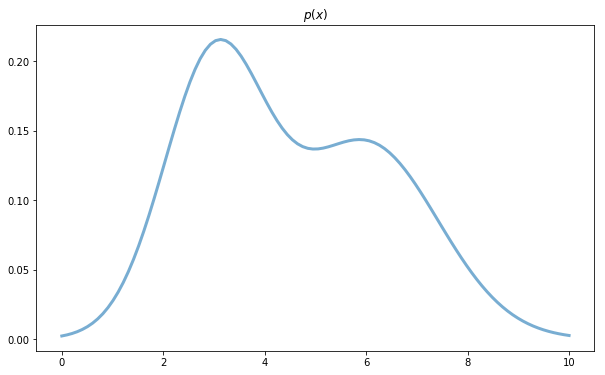

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.gca()
x = np.linspace(0, 10, 100)
ax.plot(x, eval_p(x), lw=3, alpha=0.6)
plt.title('$p(x)$')
plt.show()

## Solution

If you want to see the actual expected value, paste the following link into your browser.  If you want to try and find the right value yourself.

http://www.wolframalpha.com/input/?source=frontpage-immediate-access&i=integrate++x*+sqrt(1%2F(8*pi))*exp(%E2%88%92(x+%E2%88%92+3)%5E2%2F2)+%2B+x*sqrt(1%2F(16*pi))*exp(%E2%88%92(x+%E2%88%92+6)%5E2%2F4)+dx+from+-inf+to+inf


In [109]:
from scipy.stats import norm

# Let's use the normal distribution for the sampling.  However we need to ensure that the space is sampled properly.  Observe that q(x) > 0 everywhere
# but for the current parameters (mean=0, scale=1) but if you repeat your estimation several times, you will see a large variation.  Why is that?

# Try to change the standard deviation (scale) around.  What's the effect, when you look at the **estimate_expected_value** plot below?

def designed_q(x):
    return norm.pdf(x, loc=0, scale=1)

def sample_q(size):
    return norm.rvs(loc=0,scale=1,size=size)

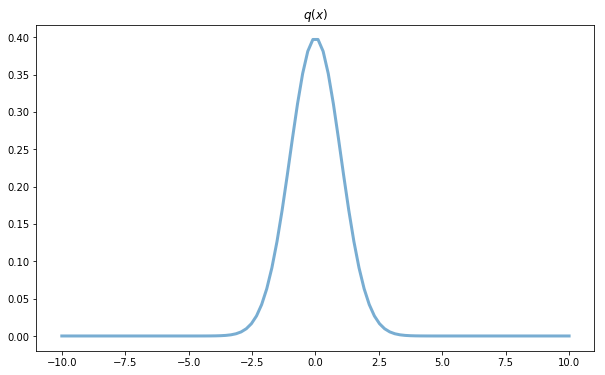

In [110]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
x = np.linspace(-10, 10, 100)
ax.plot(x, designed_q(x), lw=3, alpha=0.6)
plt.title('$q(x)$')
plt.show()

In [111]:
def estimate_expected_value(n):
    xs = sample_q(n)
    return np.mean([x*eval_p(x)/designed_q(x) for x in xs])

In [112]:
[estimate_expected_value(n=n) for n in [500, 1000, 5000, 10000]]

[0.69593745816421793,
 0.54667231688336715,
 2.1823619770103471,
 0.90434485865391578]

### Lessons learned
- It's possible to computed expected values for distributions that we cannot sample but can only evaluate.
- It's not so easy to tune an importance sampler.
- It's always tricky to assess convergence. Bonus exercises: assess the variance of your estimate.

## Rejection sampling


### Sampling Markov Chains

The expectation above assumes that the draws of $\theta$ are **independent**. The limitation in using Monte Carlo sampling for Bayesian inference is that it is not usually feasible to make independent draws from the posterior distribution. 

The first "MC" in MCMC stands for **Markov chain**. A Markov chain is a **stochastic process**, an indexed set of random variables, where the value of a particular random variable in the set is dependent only on the random variable corresponding to the prevous index. This is a Markovian dependence structure:

$$Pr(X_{t+1}=x_{t+1} | X_t=x_t, X_{t-1}=x_{t-1},\ldots,X_0=x_0) = Pr(X_{t+1}=x_{t+1} | X_t=x_t)$$

This conditioning specifies that the future depends on the current state, but not past states. Thus, the Markov chain wanders about the state space, remembering only where it has just been in the last time step. The collection of transition probabilities is sometimes called a *transition matrix* when dealing with discrete states, or more generally, a *transition kernel*.

MCMC allows us to generate samples from a particular posterior distribution as a Markov chain. The magic is that the resulting sample, even though it is dependent in this way, is indistinguishable from an independent sample from the true posterior.

## Why MCMC Works: Reversible Markov Chains

Markov chain Monte Carlo simulates a Markov chain for which some function of interest
(*e.g.* the joint distribution of the parameters of some model) is the unique, invariant limiting distribution. An invariant distribution with respect to some Markov chain with transition kernel $Pr(y \mid x)$ implies that:

$$\begin{gathered}
\begin{split}\int_x Pr(y \mid x) \pi(x) dx = \pi(y).\end{split}\notag\\\begin{split}\end{split}\notag
\end{gathered}$$

Invariance is guaranteed for any *reversible* Markov chain. Consider a Markov chain in reverse sequence:
$\{\theta^{(n)},\theta^{(n-1)},...,\theta^{(0)}\}$. This sequence is still Markovian, because:

$$\begin{gathered}
\begin{split}Pr(\theta^{(k)}=y \mid \theta^{(k+1)}=x,\theta^{(k+2)}=x_1,\ldots ) = Pr(\theta^{(k)}=y \mid \theta^{(k+1)}=x)\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

Forward and reverse transition probabilities may be related through Bayes theorem:

$$\begin{gathered}
\begin{split}\end{split}\notag\end{gathered}$$

$$\begin{gathered}
\begin{split}\frac{Pr(\theta^{(k+1)}=x \mid \theta^{(k)}=y) \pi^{(k)}(y)}{\pi^{(k+1)}(x)}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

Though not homogeneous in general, $\pi$ becomes homogeneous if:

-   $n \rightarrow \infty$

-   $\pi^{(i)}=\pi$ for some $i < k$

If this chain is homogeneous it is called reversible, because it satisfies the ***detailed balance equation***:

$$\begin{gathered}
\begin{split}\pi(x)Pr(y \mid x) = \pi(y) Pr(x \mid y)\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

Reversibility is important because it has the effect of balancing movement through the entire state space. When a Markov chain is reversible, $\pi$ is the unique, invariant, stationary distribution of that chain. Hence, if $\pi$ is of interest, we need only find the reversible Markov chain for which $\pi$ is the limiting distribution.
This is what MCMC does!

## The Metropolis-Hastings Algorithm

One of the simplest and most flexible MCMC algorithms is the Metropolis-Hastings sampler. This algorithm generates candidate state transitions from an auxilliary distribution, and accepts or rejects each candidate probabilistically, according to the posterior distribution of the model.

Let us first consider a simple Metropolis-Hastings algorithm for a single parameter, $\theta$. We will use a standard sampling distribution, referred to as the *proposal distribution*, to produce candidate variables $q_t(\theta^{\prime} | \theta)$. That is, the generated value, $\theta^{\prime}$, is a *possible* next value for
$\theta$ at step $t+1$. We also need to be able to calculate the probability of moving back to the original value from the candidate, or
$q_t(\theta | \theta^{\prime})$. These probabilistic ingredients are used to define an *acceptance ratio*:

$$\begin{gathered}
\begin{split}a(\theta^{\prime},\theta) = \frac{q_t(\theta^{\prime} | \theta) \pi(\theta^{\prime})}{q_t(\theta | \theta^{\prime}) \pi(\theta)}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

The value of $\theta^{(t+1)}$ is then determined by:

$$\begin{gathered}
\begin{split}\theta^{(t+1)} = \left\{\begin{array}{l@{\quad \mbox{with prob.} \quad}l}\theta^{\prime} & \min(a(\theta^{\prime},\theta^{(t)}),1) \\ \theta^{(t)} & 1 - \min(a(\theta^{\prime},\theta^{(t)}),1) \end{array}\right.\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

This transition kernel implies that movement is not guaranteed at every step. It only occurs if the suggested transition is likely based on the acceptance ratio.

A single iteration of the Metropolis-Hastings algorithm proceeds as follows:

The original form of the algorithm specified by Metropolis required that
$q_t(\theta^{\prime} | \theta) = q_t(\theta | \theta^{\prime})$, which reduces $a(\theta^{\prime},\theta)$ to
$\pi(\theta^{\prime})/\pi(\theta)$, but this is not necessary. In either case, the state moves to high-density points in the distribution with high probability, and to low-density points with low probability. After convergence, the Metropolis-Hastings algorithm describes the full target posterior density, so all points are recurrent.

1.  Sample $\theta^{\prime}$ from $q(\theta^{\prime} | \theta^{(t)})$.

2.  Generate a Uniform[0,1] random variate $u$.

3.  If $a(\theta^{\prime},\theta) > u$ then
    $\theta^{(t+1)} = \theta^{\prime}$, otherwise
    $\theta^{(t+1)} = \theta^{(t)}$.

### Random-walk Metropolis-Hastings

A practical implementation of the Metropolis-Hastings algorithm makes use of a random-walk proposal.
Recall that a random walk is a Markov chain that evolves according to:

$$
\theta^{(t+1)} = \theta^{(t)} + \epsilon_t \\
\epsilon_t \sim f(\phi)
$$

As applied to the MCMC sampling, the random walk is used as a proposal distribution, whereby dependent proposals are generated according to:

$$\begin{gathered}
\begin{split}q(\theta^{\prime} | \theta^{(t)}) = f(\theta^{\prime} - \theta^{(t)}) = \theta^{(t)} + \epsilon_t\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

Generally, the density generating $\epsilon_t$ is symmetric about zero,
resulting in a symmetric chain. Chain symmetry implies that
$q(\theta^{\prime} | \theta^{(t)}) = q(\theta^{(t)} | \theta^{\prime})$,
which reduces the Metropolis-Hastings acceptance ratio to:

$$\begin{gathered}
\begin{split}a(\theta^{\prime},\theta) = \frac{\pi(\theta^{\prime})}{\pi(\theta)}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

The choice of the random walk distribution for $\epsilon_t$ is frequently a normal or Student’s $t$ density, but it may be any distribution that generates an irreducible proposal chain.

An important consideration is the specification of the scale parameter for the random walk error distribution. Large values produce random walk steps that are highly exploratory, but tend to produce proposal values in the tails of the target distribution, potentially resulting in very small acceptance rates. Conversely, small values tend to be accepted more frequently, since they tend to produce proposals close to the current parameter value, but may result in chains that mix very slowly.
Some simulation studies suggest optimal acceptance rates in the range of 20-50%. It is often worthwhile to optimize the proposal variance by iteratively adjusting its value, according to observed acceptance rates early in the MCMC simulation .

# Hamiltonian Monte Carlo

While flexible and easy to implement, Metropolis-Hastings sampling is a random walk
sampler that might not be statistically efficient for many models. In
this context, and when sampling from continuous variables, Hamiltonian (or Hybrid) Monte
Carlo (HMC) can prove to be a powerful tool. It avoids
random walk behavior by simulating a physical system governed by
Hamiltonian dynamics, potentially avoiding tricky conditional
distributions in the process.

![hmc comparison](images/hmc.png)

In HMC, model samples are obtained by simulating a physical system,
where particles move about a high-dimensional landscape, subject to
potential and kinetic energies. Adapting the notation from [Neal (1993)](http://www.cs.toronto.edu/~radford/review.abstract.html),
particles are characterized by a position vector or state
$s \in \mathcal{R}^D$ and velocity vector $\phi \in \mathcal{R}^D$. The
combined state of a particle is denoted as $\chi=(s,\phi)$. The
Hamiltonian is then defined as the sum of potential energy $E(s)$ and kinetic energy
$K(\phi)$, as follows:

$$\mathcal{H}(s,\phi) = E(s) + K(\phi)
= E(s) + \frac{1}{2} \sum_i \phi_i^2$$

Instead of sampling $p(s)$ directly, HMC operates by sampling from the
canonical distribution
$p(s,\phi) = \frac{1}{Z} \exp(-\mathcal{H}(s,\phi))=p(s)p(\phi)$.
Because the two variables are independent, marginalizing over $\phi$ is
trivial and recovers the original distribution of interest.

**Hamiltonian Dynamics**

State $s$ and velocity $\phi$ are modified such that
$\mathcal{H}(s,\phi)$ remains constant throughout the simulation. The
differential equations are given by:

$$\begin{aligned}\frac{ds_i}{dt} &= \frac{\partial \mathcal{H}}{\partial \phi_i} = \phi_i \\
\frac{d\phi_i}{dt} &= - \frac{\partial \mathcal{H}}{\partial s_i}
= - \frac{\partial E}{\partial s_i}
\end{aligned}$$

As shown in [Neal (1993)](http://www.cs.toronto.edu/~radford/review.abstract.html), 
the above transformation preserves volume and is
reversible. The above dynamics can thus be used as transition operators
of a Markov chain and will leave $p(s,\phi)$ invariant. That chain by
itself is not ergodic however, since simulating the dynamics maintains a
fixed Hamiltonian $\mathcal{H}(s,\phi)$. HMC thus alternates Hamiltonian
dynamic steps, with Gibbs sampling of the velocity. Because $p(s)$ and
$p(\phi)$ are independent, sampling $\phi_{new} \sim p(\phi|s)$ is
trivial since $p(\phi|s)=p(\phi)$, where $p(\phi)$ is often taken to be
the univariate Gaussian.

**The Leap-Frog Algorithm**

In practice, we cannot simulate Hamiltonian dynamics exactly because of
the problem of time discretization. There are several ways one can do
this. To maintain invariance of the Markov chain however, care must be
taken to preserve the properties of *volume conservation* and *time
reversibility*. The **leap-frog algorithm** maintains these properties
and operates in 3 steps:

$$\begin{aligned}
\phi_i(t + \epsilon/2) &= \phi_i(t) - \frac{\epsilon}{2} \frac{\partial{}}{\partial s_i} E(s(t)) \\
s_i(t + \epsilon) &= s_i(t) + \epsilon \phi_i(t + \epsilon/2) \\
\phi_i(t + \epsilon) &= \phi_i(t + \epsilon/2) - \frac{\epsilon}{2} \frac{\partial{}}{\partial s_i} E(s(t + \epsilon)) 
\end{aligned}$$

We thus perform a half-step update of the velocity at time
$t+\epsilon/2$, which is then used to compute $s(t + \epsilon)$ and
$\phi(t + \epsilon)$.

**Accept / Reject**

In practice, using finite stepsizes $\epsilon$ will not preserve
$\mathcal{H}(s,\phi)$ exactly and will introduce bias in the simulation.
Also, rounding errors due to the use of floating point numbers means
that the above transformation will not be perfectly reversible.

HMC cancels these effects **exactly** by adding a Metropolis
accept/reject stage, after $n$ leapfrog steps. The new state
$\chi' = (s',\phi')$ is accepted with probability $p_{acc}(\chi,\chi')$,
defined as:

$$p_{acc}(\chi,\chi') = min \left( 1, \frac{\exp(-\mathcal{H}(s',\phi')}{\exp(-\mathcal{H}(s,\phi)} \right)$$

**HMC Algorithm**

We obtain a new HMC sample as follows:

1.  sample a new velocity from a univariate Gaussian distribution
2.  perform $n$ leapfrog steps to obtain the new state $\chi'$
3.  perform accept/reject move of $\chi'$

## No U-Turn Sampling

The major drawback of the HMC algorithm is the extensive tuning required to make it sample efficiency. There are a handful of parameters that require specification by the user:

- the scaling of the momentum distribution
- the step size forthe leapfrog algorithm
- the number of steps to be taken for the leapfrog algorithm

When these parameters are poorly-chosen, the HMC algorithm can suffer severe losses in efficiency. For example, if we take steps that are too short, the simulation becomes a random walk, while steps that are too long end up retracing paths already taken.

An efficient MCMC algorithm seeks to optimize mixing, while maintaining detailed balance. While HMC can be tuned on-the-fly, it requires costly burn-in runs to do so.

![nuts](images/nuts.png)

The No U-turn Sampling (NUTS) algorithm automatically tunes the step size and step number parameters, without any intervention from the user. To do so, NUTS constructs a binary tree of leapfrog steps by repeated doubling. When the trajectory of steps creates an angle of more than 90 degrees (*i.e.* a u-turn), the doubling stops, and a point is proposed.

![binary doubling](images/binary_doubling.png)

NUTS provides the efficiency of gradient-based MCMC sampling without extensive user intervention required to tune Hamiltonian Monte Carlo. As the result, NUTS is the default sampling algorithm for continuous variables in PyMC3.

## References

1. [Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., and Rubin, D. B. (2013)](http://www.stat.columbia.edu/~gelman/book/). Bayesian Data Analysis. Chapman &Hall/CRC Press, London, third edition.
2. [Geyer, C. (2013)](http://www.mcmchandbook.net/HandbookChapter1.pdf) Introduction to Markov Chain Monte Carlo. In *Handbook of Markov Chain Monte Carlo*, S. Brooks, A. Gelman, G. Jones, X.L. Meng, eds. CRC Press.
3. [Neal, R.M. (1993)](http://www.cs.toronto.edu/~radford/review.abstract.html) Probabilistic Inference Using Markov Chain Monte Carlo Methods, Technical Report CRG-TR-93-1, Dept. of Computer Science, University of Toronto, 144 pages.
